In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 377.1+ KB


In [4]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### Convert Data to a proper form

In [5]:
import datetime

In [6]:
df['Day'] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.day

In [7]:
df['Month'] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.month

In [8]:
df['Year'] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.year

In [9]:
df.drop("Date", axis=1, inplace=True)

In [10]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


## EDA

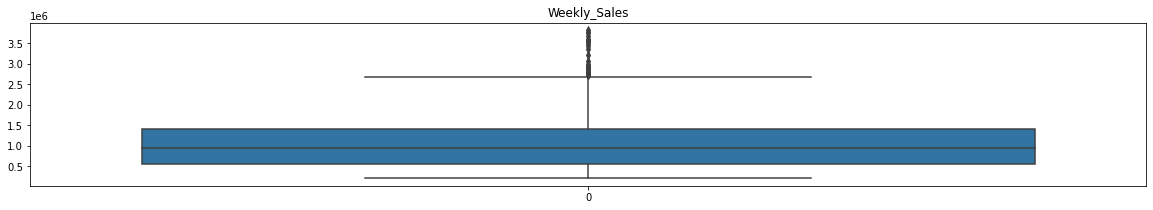

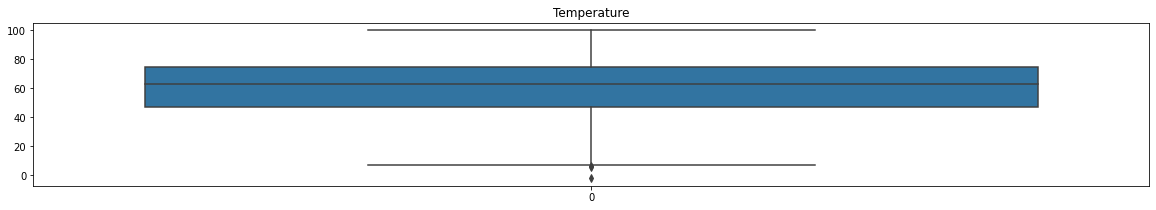

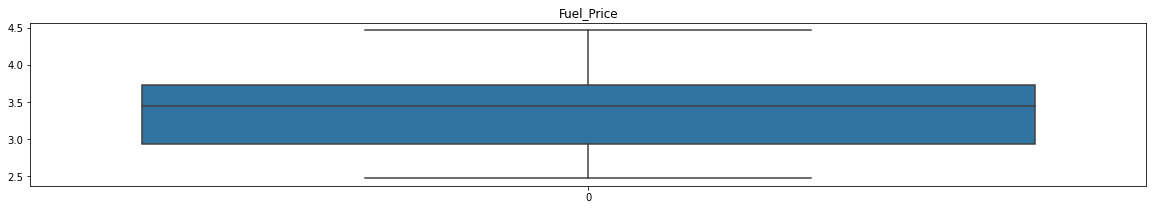

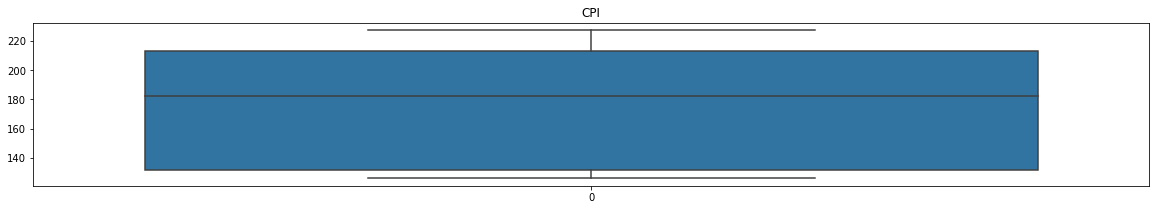

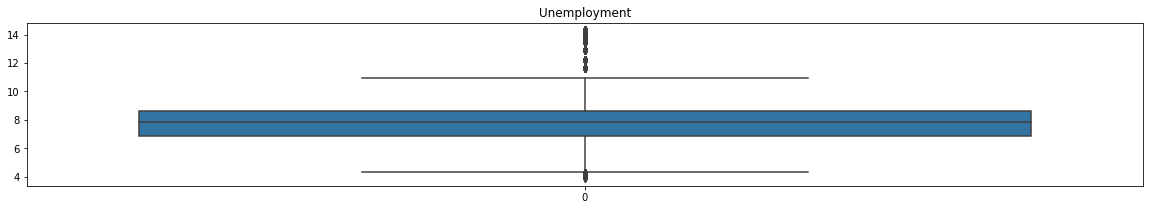

In [11]:
for i in df.columns:
    if df[i].dtype == "float64":
        plt.figure(figsize=(20,3))
        sns.boxplot(df[i])
        plt.title(i)

We can observe that there are some outliers for in the sales data as well as in the unemployment values. For the moment we will keep the data as it is.

<ipython-input-12-0310887653c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Unemployment'])


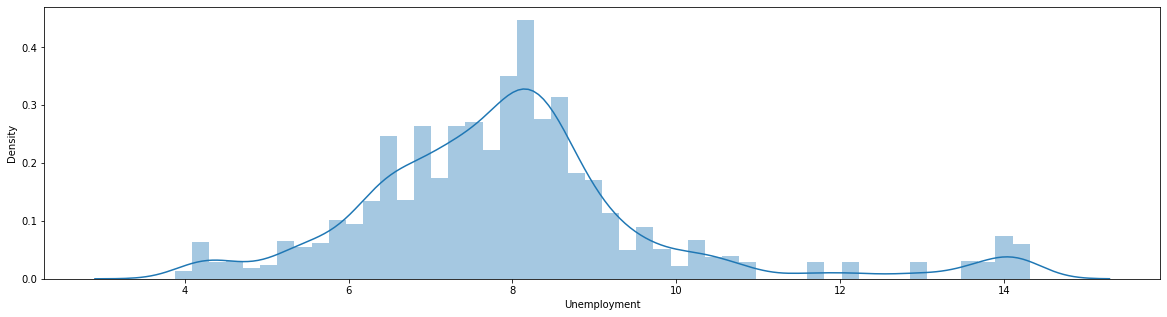

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(df['Unemployment'])

<ipython-input-13-210c62f3de83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


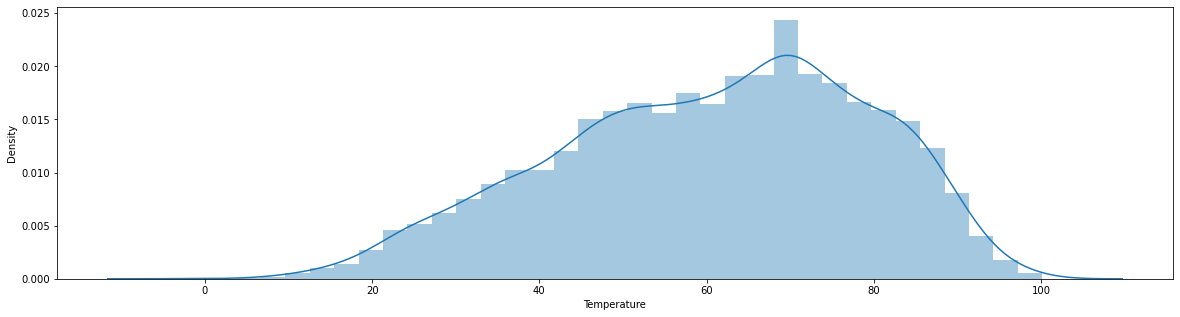

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df['Temperature'])

<ipython-input-14-238595282c05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CPI'])


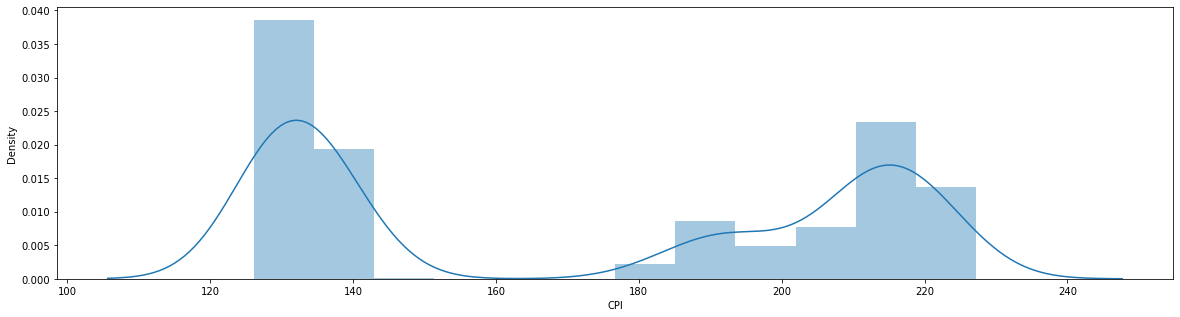

In [14]:
plt.figure(figsize=(20,5))
sns.distplot(df['CPI'])

The fact that we have a bimodal CPI distribution suggests that the stores are spread over locations with different income levels (even possibly in two different states). We can do a separate visualization by year in order to confirm that inflation is not the explanatory factor for our distribution results.

<ipython-input-15-514a16259643>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['CPI'])
<ipython-input-15-514a16259643>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['CPI'])
<ipython-input-15-514a16259643>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in

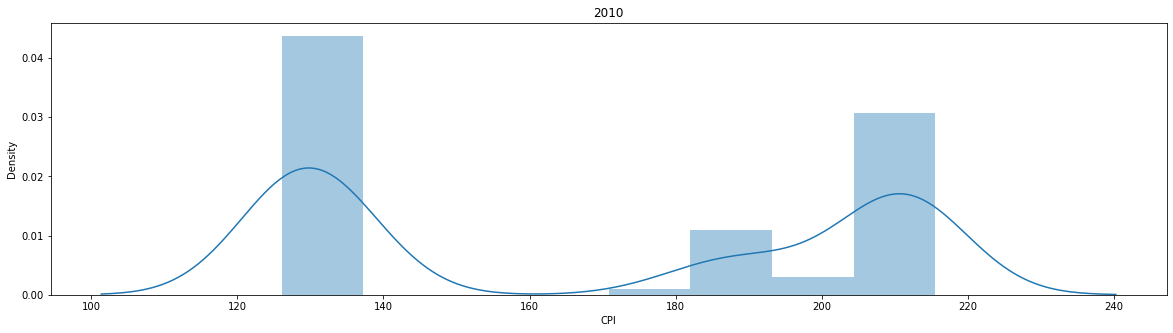

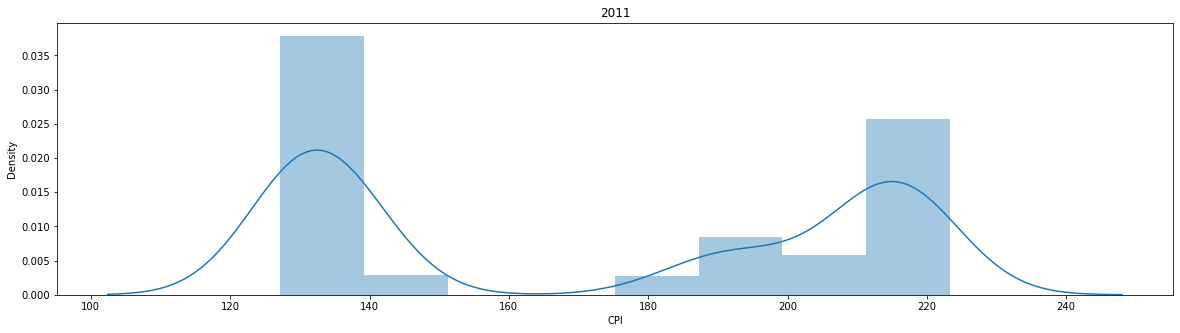

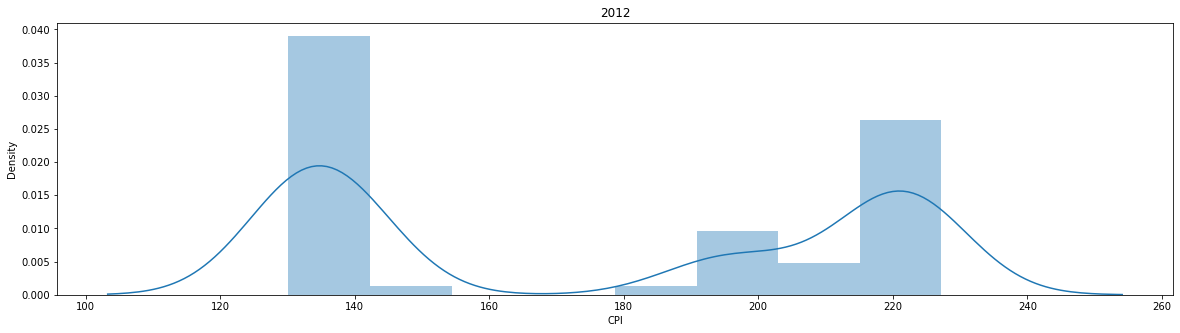

In [15]:
for i in df.Year.unique():
    temp = df.loc[df.Year == i]
    plt.figure(figsize=(20,5))
    sns.distplot(temp['CPI'])
    plt.title(i)

## CPI & Unemployment by Store

Text(0, 0.5, 'Store Number')

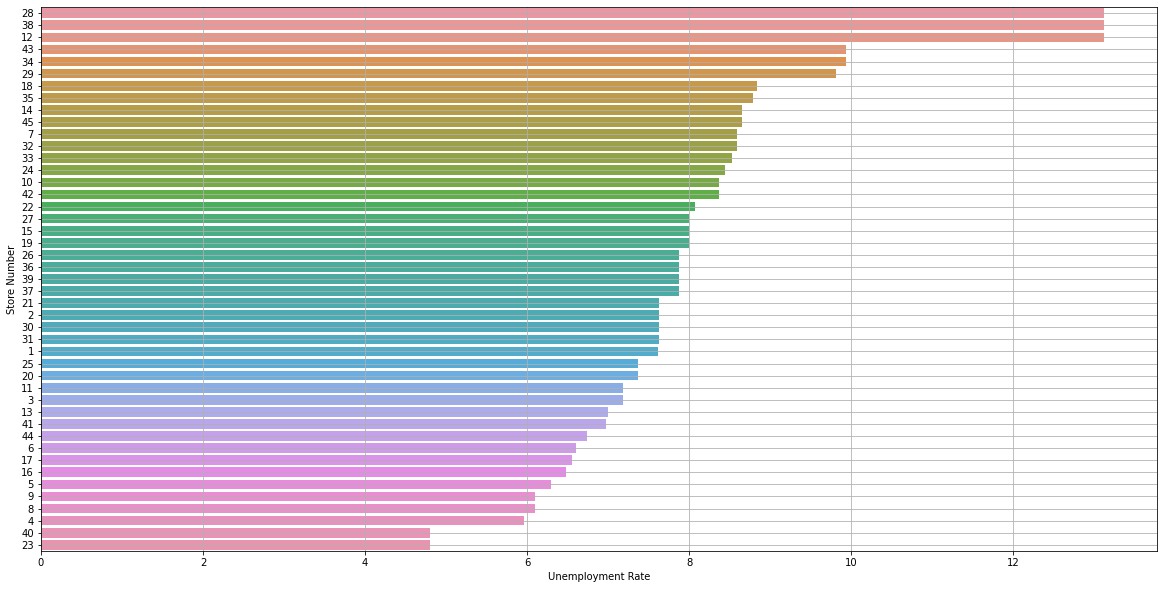

In [16]:
temp = df.groupby("Store").mean()
plt.figure(figsize=(20,10))
sns.barplot(data=temp, x=temp['Unemployment'], y=temp.index, order=temp.sort_values('Unemployment', ascending=False).index, orient='h')
plt.grid()
plt.xlabel("Unemployment Rate")
plt.ylabel("Store Number")

The graph shows that the stores are located in towns of different characteristics (either in the same state or in different ones). We can conclude this due to the fact that some of the stores are located in areas with very low unemployment rates (%4) while others have high rates (%12)

Text(0, 0.5, 'Store Number')

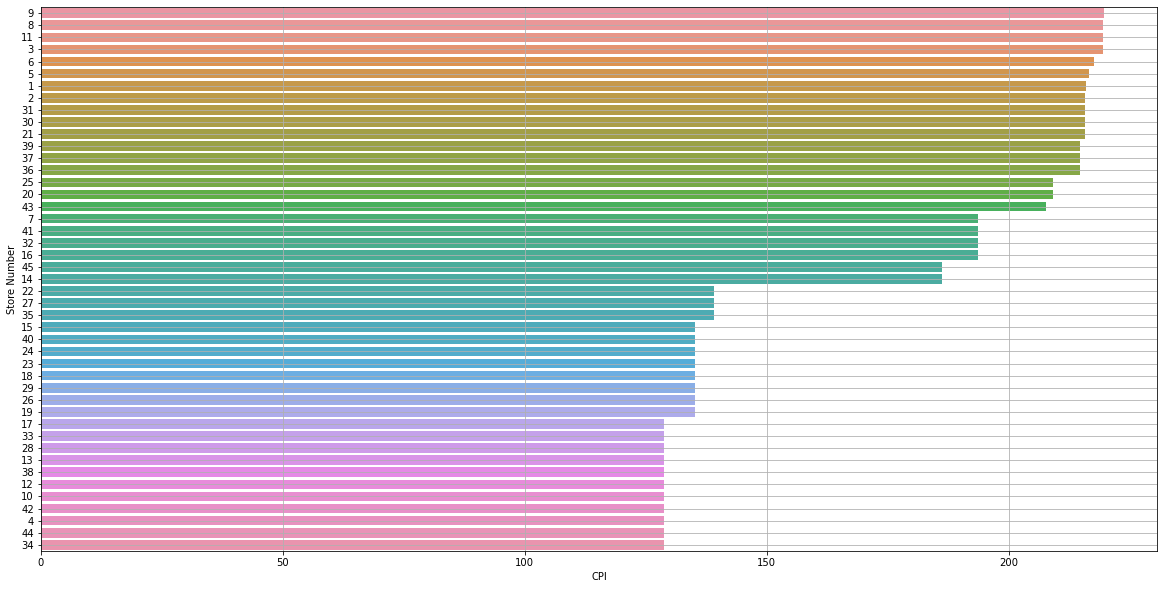

In [17]:
temp2 = df.groupby("Store").mean()
plt.figure(figsize=(20,10))
sns.barplot(data=temp2, x=temp2['CPI'], y=temp2.index, order=temp2.sort_values('CPI', ascending=False).index, orient='h')
plt.grid()
plt.xlabel("CPI")
plt.ylabel("Store Number")

Similarly, we can observe that there is also a high variablity in the CPI levels amongst the store locations which could be another indicator of the economic and perhaps even the geographical differences.

Text(0, 0.5, 'Store Number')

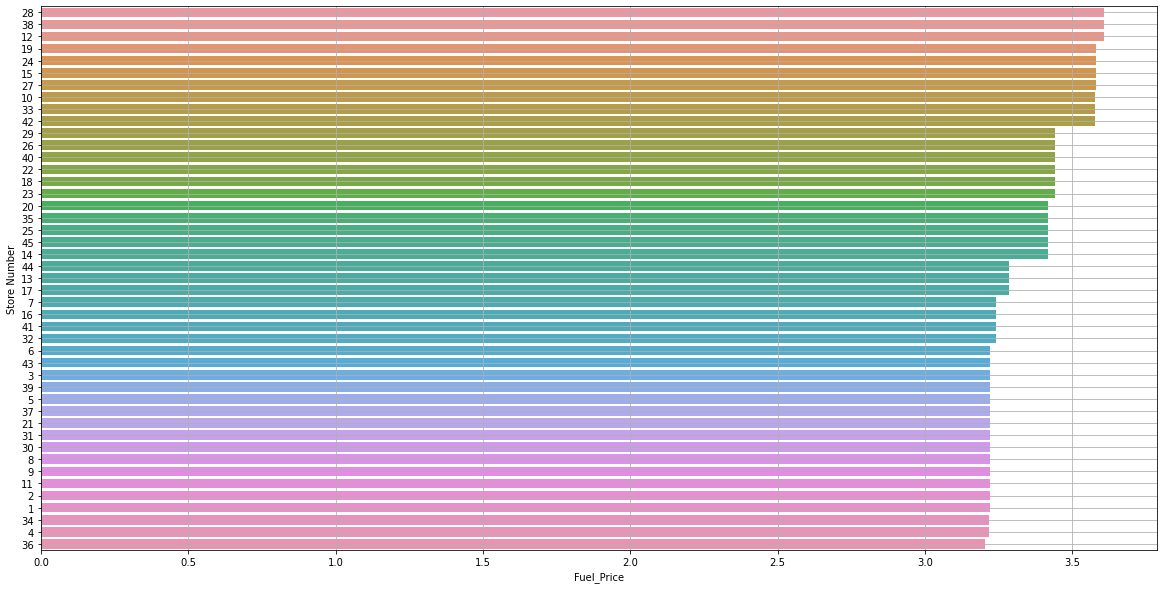

In [18]:
temp3 = df.groupby("Store").mean()
plt.figure(figsize=(20,10))
sns.barplot(data=temp3, x=temp3['Fuel_Price'], y=temp3.index, order=temp3.sort_values('Fuel_Price', ascending=False).index, orient='h')
plt.grid()
plt.xlabel("Fuel_Price")
plt.ylabel("Store Number")

## Analysis of Sales by Year

Text(0.5, 1.0, 'Accumulated Sales by Year')

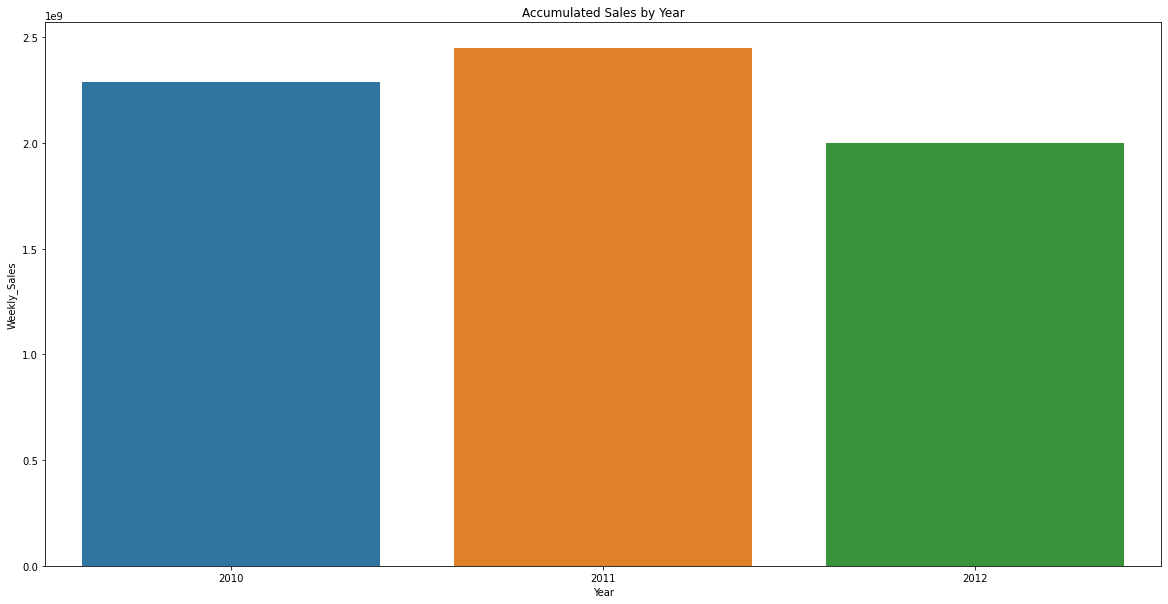

In [19]:
sales_by_year = df.groupby("Year").sum()
plt.figure(figsize=(20,10))
sns.barplot(data=sales_by_year,x=sales_by_year.index,y=sales_by_year['Weekly_Sales'])
plt.title("Accumulated Sales by Year")

Text(0.5, 1.0, 'Average Weekly Sales by Year')

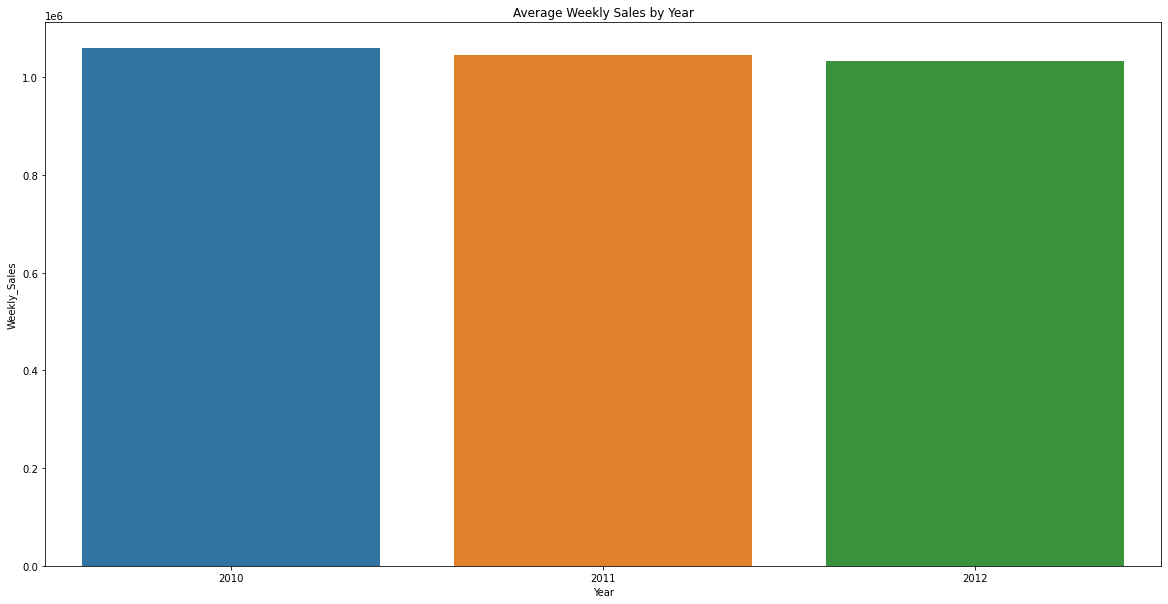

In [20]:
sales_by_year2 = df.groupby("Year").mean()
plt.figure(figsize=(20,10))
sns.barplot(data=sales_by_year2,x=sales_by_year2.index,y=sales_by_year2['Weekly_Sales'])
plt.title("Average Weekly Sales by Year")

The accumulated sales graph can be misleading given the fact that only 2011 has records for the entire year. For both 2010 and 2012 we have some missing months and thus an innacurate quantity. The second plot shows us the averga weekly sales which levels the field a bit more and effectively shows a different result.

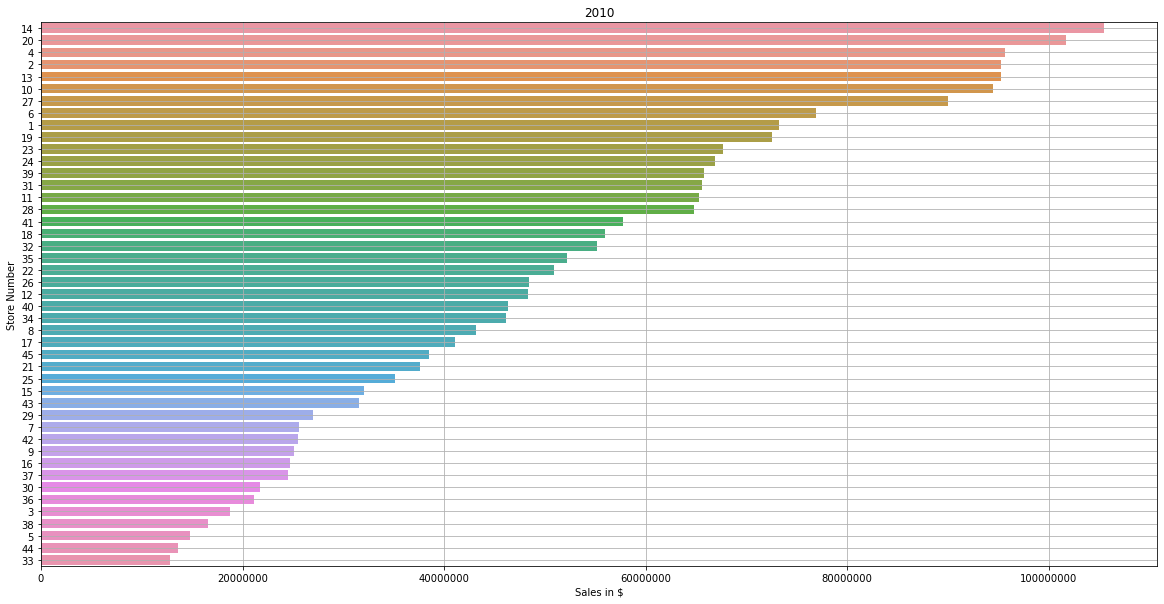

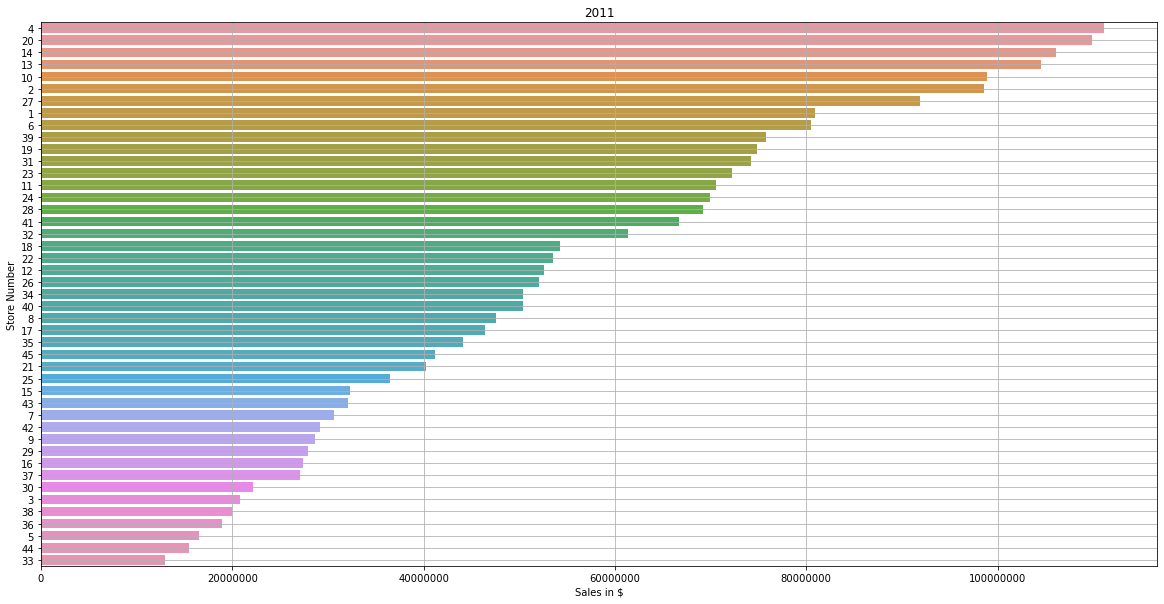

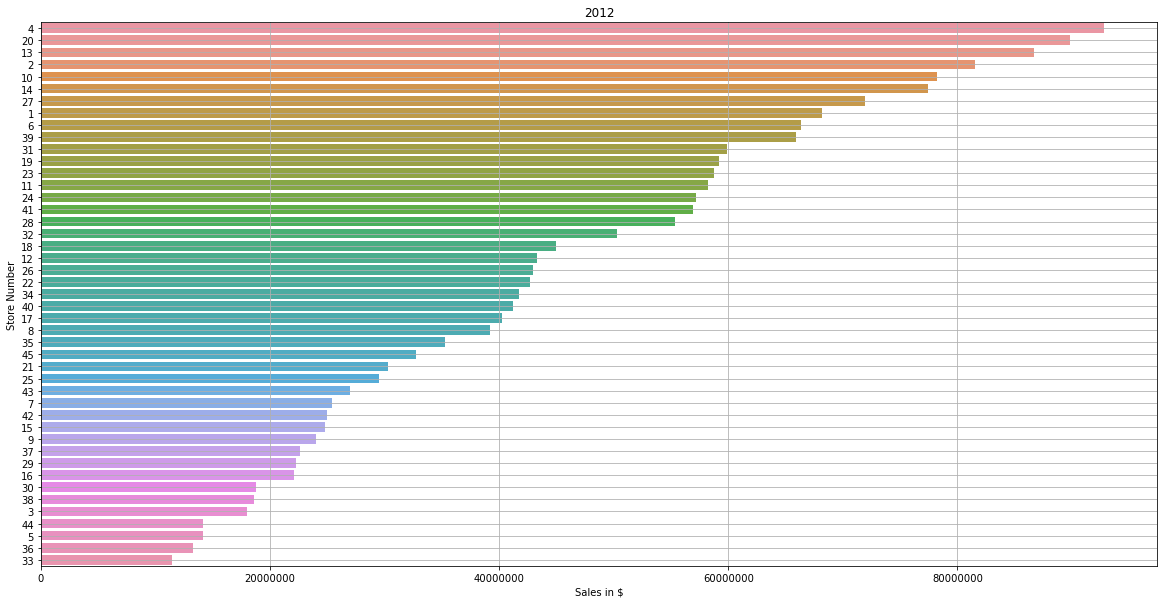

In [21]:
for i in df.Year.unique():
    temp = df.loc[df.Year == i]
    temp2 = temp.groupby('Store').sum()
    plt.figure(figsize=(20,10))
    sns.barplot(data=temp2,x=temp2['Weekly_Sales'],y=temp2.index,order=temp2.sort_values("Weekly_Sales", ascending=False).index, orient='h')
    plt.title(i)
    plt.ylabel("Store Number")
    plt.xlabel("Sales in $")
    plt.ticklabel_format(useOffset=False,style="plain", axis="x")
    plt.grid()

We can observe that there is a wide spread in terms of sales. The highest grossing stores have sales that are more than 5 times those of smaller stores. We can also conclude that there is a roughly equal number of stores in each sales bracket level. Also, we can observe that the performance of the stores does not vary much from year to year. The stores tend to stay within the same level of sales throughout the 3 years. However, we can analyze the growth that each store had in a different graph.

### Sales Growth by Store

In [22]:
sales_2010 = df.loc[df.Year == 2010]

In [23]:
sales_2011 = df.loc[df.Year == 2011]

In [24]:
sales_2012 = df.loc[df.Year == 2012]

In [25]:
sales_avg_2010 = sales_2010.groupby("Store",as_index=False).mean()[["Weekly_Sales","Fuel_Price","CPI","Unemployment","Year","Store"]]

In [26]:
sales_avg_2011 = sales_2011.groupby("Store",as_index=False).mean()[["Weekly_Sales","Fuel_Price","CPI","Unemployment","Year","Store"]]

In [27]:
sales_avg_2012 = sales_2012.groupby("Store",as_index=False).mean()[["Weekly_Sales","Fuel_Price","CPI","Unemployment","Year","Store"]]

In [28]:
sales_avg_merged = pd.concat([sales_avg_2010,sales_avg_2011,sales_avg_2012],axis=0,ignore_index=True)

In [29]:
sales_avg_merged['Sales_Growth'] = sales_avg_merged['Weekly_Sales'].pct_change(periods=45).mul(100).round(3)

In [30]:
sales_avg_merged.replace(np.nan,0)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Year,Store,Sales_Growth
0,1.526642e+06,2.696854,211.305760,7.860729,2010.0,1,0.000
1,1.984956e+06,2.696854,210.963620,8.182521,2010.0,2,0.000
2,3.905296e+05,2.696854,214.618661,7.412438,2010.0,3,0.000
3,1.993343e+06,2.706896,126.382362,7.650958,2010.0,4,0.000
4,3.090840e+05,2.696854,211.860756,6.578604,2010.0,5,0.000
...,...,...,...,...,...,...,...
130,1.322973e+06,3.572093,197.701727,6.492186,2012.0,41,3.116
131,5.802409e+05,3.986163,130.817673,7.326349,2012.0,42,3.624
132,6.273310e+05,3.549930,213.073682,9.442442,2012.0,43,1.772
133,3.299389e+05,3.578419,130.817673,5.564977,2012.0,44,10.702


In [31]:
sales_growth_rk = sales_avg_merged.loc[sales_avg_merged.index >= 45].groupby("Store").mean().sort_values("Sales_Growth",ascending=False)["Sales_Growth"]
sales_growth_rk

Store
38    11.9770
44     7.9175
39     5.7385
7      5.3735
41     4.8885
17     4.5960
42     4.5170
4      4.0815
3      3.6080
5      3.2540
9      3.2195
1      1.9290
37     1.4875
31     1.0340
32     0.8600
13     0.7940
8      0.6860
34     0.4785
33     0.2060
12     0.0040
16    -0.0840
11    -0.2345
40    -0.4275
26    -0.4310
20    -0.7195
23    -1.5690
30    -1.6715
6     -1.8835
43    -2.2045
2     -2.2600
24    -2.3030
28    -2.3520
45    -2.6330
25    -3.1995
22    -3.2465
10    -3.8555
29    -4.0060
19    -4.5700
21    -5.1900
18    -5.2035
27    -5.5595
15    -6.9705
14    -9.4340
35   -12.6880
36   -16.2605
Name: Sales_Growth, dtype: float64

In [32]:
sales_avg_merged['Unemployment_Growth'] = sales_avg_merged['Unemployment'].pct_change(periods=45).mul(100).round(3)

In [33]:
sales_avg_merged.replace(np.nan,0)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Year,Store,Sales_Growth,Unemployment_Growth
0,1.526642e+06,2.696854,211.305760,7.860729,2010.0,1,0.000,0.000
1,1.984956e+06,2.696854,210.963620,8.182521,2010.0,2,0.000,0.000
2,3.905296e+05,2.696854,214.618661,7.412438,2010.0,3,0.000,0.000
3,1.993343e+06,2.706896,126.382362,7.650958,2010.0,4,0.000,0.000
4,3.090840e+05,2.696854,211.860756,6.578604,2010.0,5,0.000,0.000
...,...,...,...,...,...,...,...,...
130,1.322973e+06,3.572093,197.701727,6.492186,2012.0,41,3.116,-6.617
131,5.802409e+05,3.986163,130.817673,7.326349,2012.0,42,3.624,-12.079
132,6.273310e+05,3.549930,213.073682,9.442442,2012.0,43,1.772,-9.613
133,3.299389e+05,3.578419,130.817673,5.564977,2012.0,44,10.702,-16.682


In [34]:
unemployment_growth_rk = sales_avg_merged.loc[sales_avg_merged.index >= 45].groupby("Store").mean().sort_values("Unemployment_Growth",ascending=False)["Unemployment_Growth"]
unemployment_growth_rk

Store
24     3.7665
27     0.6485
19    -0.3310
15    -0.3310
35    -0.7745
45    -1.4305
14    -1.4305
43    -1.6230
34    -1.6230
25    -3.7470
20    -3.7470
17    -4.3005
22    -4.8135
1     -4.9860
18    -5.5095
29    -5.6700
11    -5.7225
3     -5.7225
32    -5.7580
7     -5.7580
26    -5.8865
8     -5.9870
16    -6.0870
5     -6.3870
41    -6.5070
9     -7.9910
6     -8.7275
31    -8.8990
30    -8.8990
2     -8.8990
21    -8.8990
36    -9.5680
37    -9.5680
39    -9.5680
28    -9.9155
12    -9.9155
38    -9.9155
10   -11.3555
42   -11.3555
23   -12.3530
40   -12.3530
33   -12.6955
13   -14.0550
44   -15.7735
4    -25.1260
Name: Unemployment_Growth, dtype: float64

In [35]:
sales_avg_merged['Fuel_Price_Growth'] = sales_avg_merged['Fuel_Price'].pct_change(periods=45).mul(100).round(3)

In [36]:
sales_avg_merged.replace(np.nan,0)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Year,Store,Sales_Growth,Unemployment_Growth,Fuel_Price_Growth
0,1.526642e+06,2.696854,211.305760,7.860729,2010.0,1,0.000,0.000,0.000
1,1.984956e+06,2.696854,210.963620,8.182521,2010.0,2,0.000,0.000,0.000
2,3.905296e+05,2.696854,214.618661,7.412438,2010.0,3,0.000,0.000,0.000
3,1.993343e+06,2.706896,126.382362,7.650958,2010.0,4,0.000,0.000,0.000
4,3.090840e+05,2.696854,211.860756,6.578604,2010.0,5,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
130,1.322973e+06,3.572093,197.701727,6.492186,2012.0,41,3.116,-6.617,3.652
131,5.802409e+05,3.986163,130.817673,7.326349,2012.0,42,3.624,-12.079,6.796
132,6.273310e+05,3.549930,213.073682,9.442442,2012.0,43,1.772,-9.613,3.519
133,3.299389e+05,3.578419,130.817673,5.564977,2012.0,44,10.702,-16.682,3.281


In [37]:
Fuel_Price_growth_rk = sales_avg_merged.loc[sales_avg_merged.index >= 45].groupby("Store").mean().sort_values("Fuel_Price_Growth",ascending=False)["Fuel_Price_Growth"]
Fuel_Price_growth_rk

Store
36    16.3830
23    15.8230
40    15.8230
29    15.8230
26    15.8230
22    15.8230
18    15.8230
14    15.4825
35    15.4825
25    15.4825
20    15.4825
45    15.4825
6     15.3380
2     15.3380
43    15.3380
3     15.3380
39    15.3380
37    15.3380
5     15.3380
31    15.3380
30    15.3380
8     15.3380
1     15.3380
21    15.3380
11    15.3380
9     15.3380
24    15.2145
15    15.2145
19    15.2145
27    15.2145
32    15.0890
16    15.0890
41    15.0890
7     15.0890
34    14.8920
4     14.8920
12    14.8685
28    14.8685
38    14.8685
10    14.8120
33    14.8120
42    14.8120
17    12.8370
44    12.8370
13    12.8370
Name: Fuel_Price_Growth, dtype: float64

In [38]:
sales_avg_merged['CPI_Growth'] = sales_avg_merged['CPI'].pct_change(periods=45).mul(100).round(3)

In [39]:
sales_avg_merged.replace(np.nan,0)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Year,Store,Sales_Growth,Unemployment_Growth,Fuel_Price_Growth,CPI_Growth
0,1.526642e+06,2.696854,211.305760,7.860729,2010.0,1,0.000,0.000,0.000,0.000
1,1.984956e+06,2.696854,210.963620,8.182521,2010.0,2,0.000,0.000,0.000,0.000
2,3.905296e+05,2.696854,214.618661,7.412438,2010.0,3,0.000,0.000,0.000,0.000
3,1.993343e+06,2.706896,126.382362,7.650958,2010.0,4,0.000,0.000,0.000,0.000
4,3.090840e+05,2.696854,211.860756,6.578604,2010.0,5,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
130,1.322973e+06,3.572093,197.701727,6.492186,2012.0,41,3.116,-6.617,3.652,2.117
131,5.802409e+05,3.986163,130.817673,7.326349,2012.0,42,3.624,-12.079,6.796,1.384
132,6.273310e+05,3.549930,213.073682,9.442442,2012.0,43,1.772,-9.613,3.519,2.712
133,3.299389e+05,3.578419,130.817673,5.564977,2012.0,44,10.702,-16.682,3.281,1.384


In [40]:
CPI_growth_rk = sales_avg_merged.loc[sales_avg_merged.index >= 45].groupby("Store").mean().sort_values("CPI_Growth",ascending=False)["CPI_Growth"]
CPI_growth_rk

Store
9     2.4285
8     2.4280
3     2.4280
11    2.4280
6     2.4240
5     2.4220
1     2.4205
31    2.4195
30    2.4195
2     2.4195
21    2.4195
39    2.4150
37    2.4150
36    2.4150
20    2.4005
25    2.4005
43    2.3855
45    2.3155
14    2.3155
19    2.0745
26    2.0745
40    2.0745
18    2.0745
29    2.0745
23    2.0745
15    2.0745
24    2.0745
35    2.0665
27    2.0665
22    2.0665
41    1.9760
7     1.9760
32    1.9760
16    1.9760
34    1.7405
33    1.7405
13    1.7405
10    1.7405
38    1.7405
17    1.7405
28    1.7405
42    1.7405
4     1.7405
44    1.7405
12    1.7405
Name: CPI_Growth, dtype: float64

## Month and day of the week analysis

In [41]:
sales_by_month = df.groupby("Month").mean()

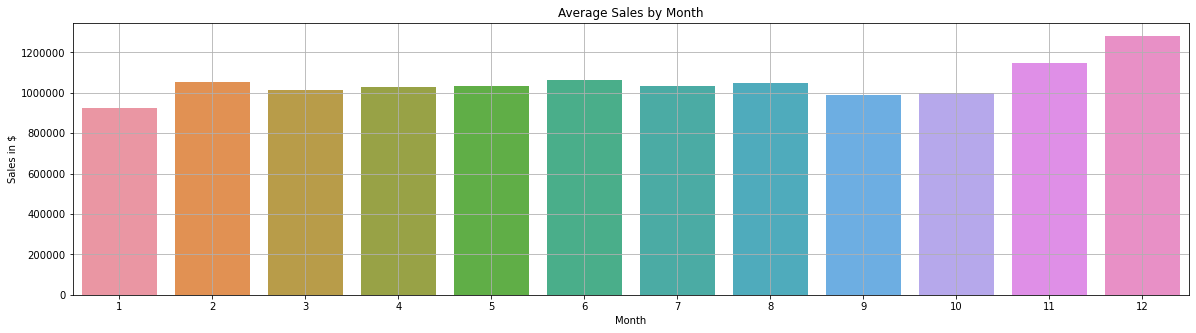

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(data=sales_by_month, x=sales_by_month.index, y=sales_by_month['Weekly_Sales'])
plt.title('Average Sales by Month')
plt.ylabel('Sales in $')
plt.ticklabel_format(useOffset=False,style="plain", axis="y")
plt.grid()

As expected, we can see that November and December are the highest selling months and that sales remain pretty stable throughout the rest of the year with only a slight bump during February which could possibly be just a rebound from sales drop in January.

In [43]:
sales_by_dow = df.groupby("Day").mean()

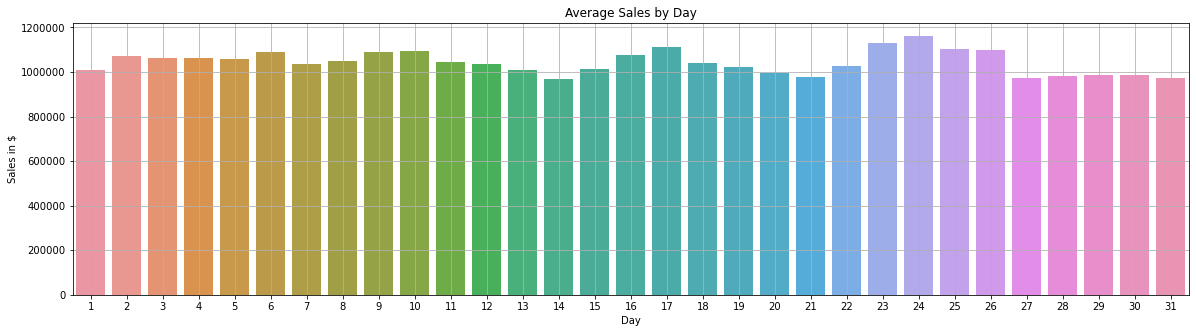

In [44]:
plt.figure(figsize=(20,5))
sns.barplot(data=sales_by_dow, x=sales_by_dow.index, y=sales_by_dow['Weekly_Sales'])
plt.title('Average Sales by Day')
plt.ylabel('Sales in $')
plt.ticklabel_format(useOffset=False,style="plain", axis="y")
plt.grid()

The graph shows a kind of cyclical pattern in which sales seem to peak every 7 days. This could be due to the fact that Walmart's customer base is mostly working class which tends to receive a weekly payment as opposed to a biweekly or monthly salary. 

## Analyzing Sales vs Economic Indices

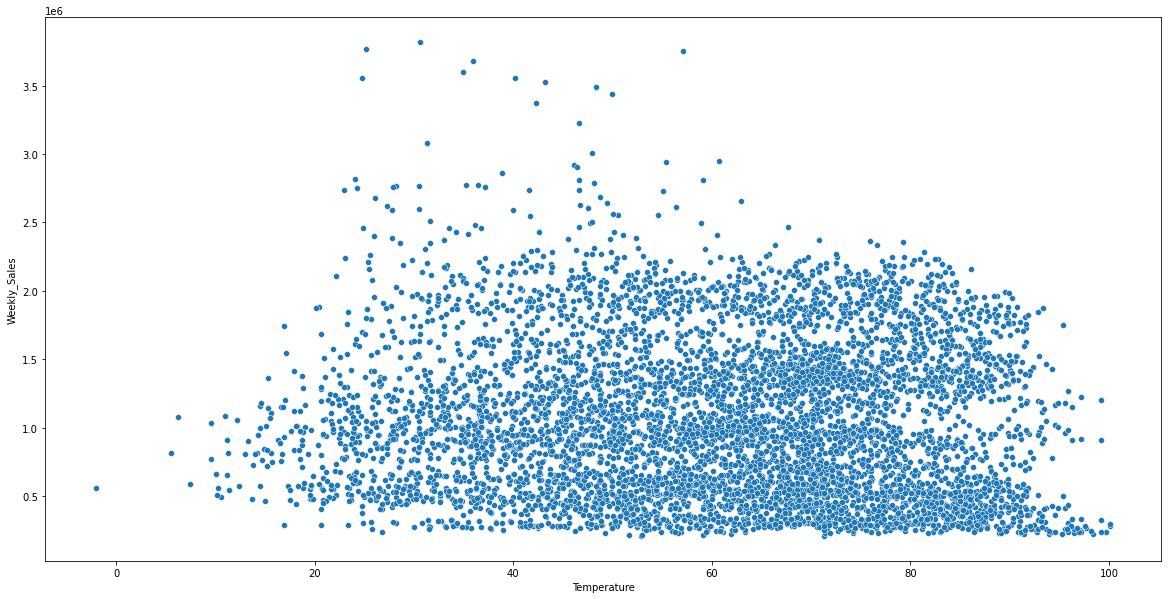

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x=df['Temperature'], y=df['Weekly_Sales'])

The scatter plot tells us that there is no clear relationship between temperature level and sales. However, given the fact that this graph consolidates all of the stores, the information may not be accurate and thus we may need to do individual graphs for each store in order to have a more accurate conclusion.

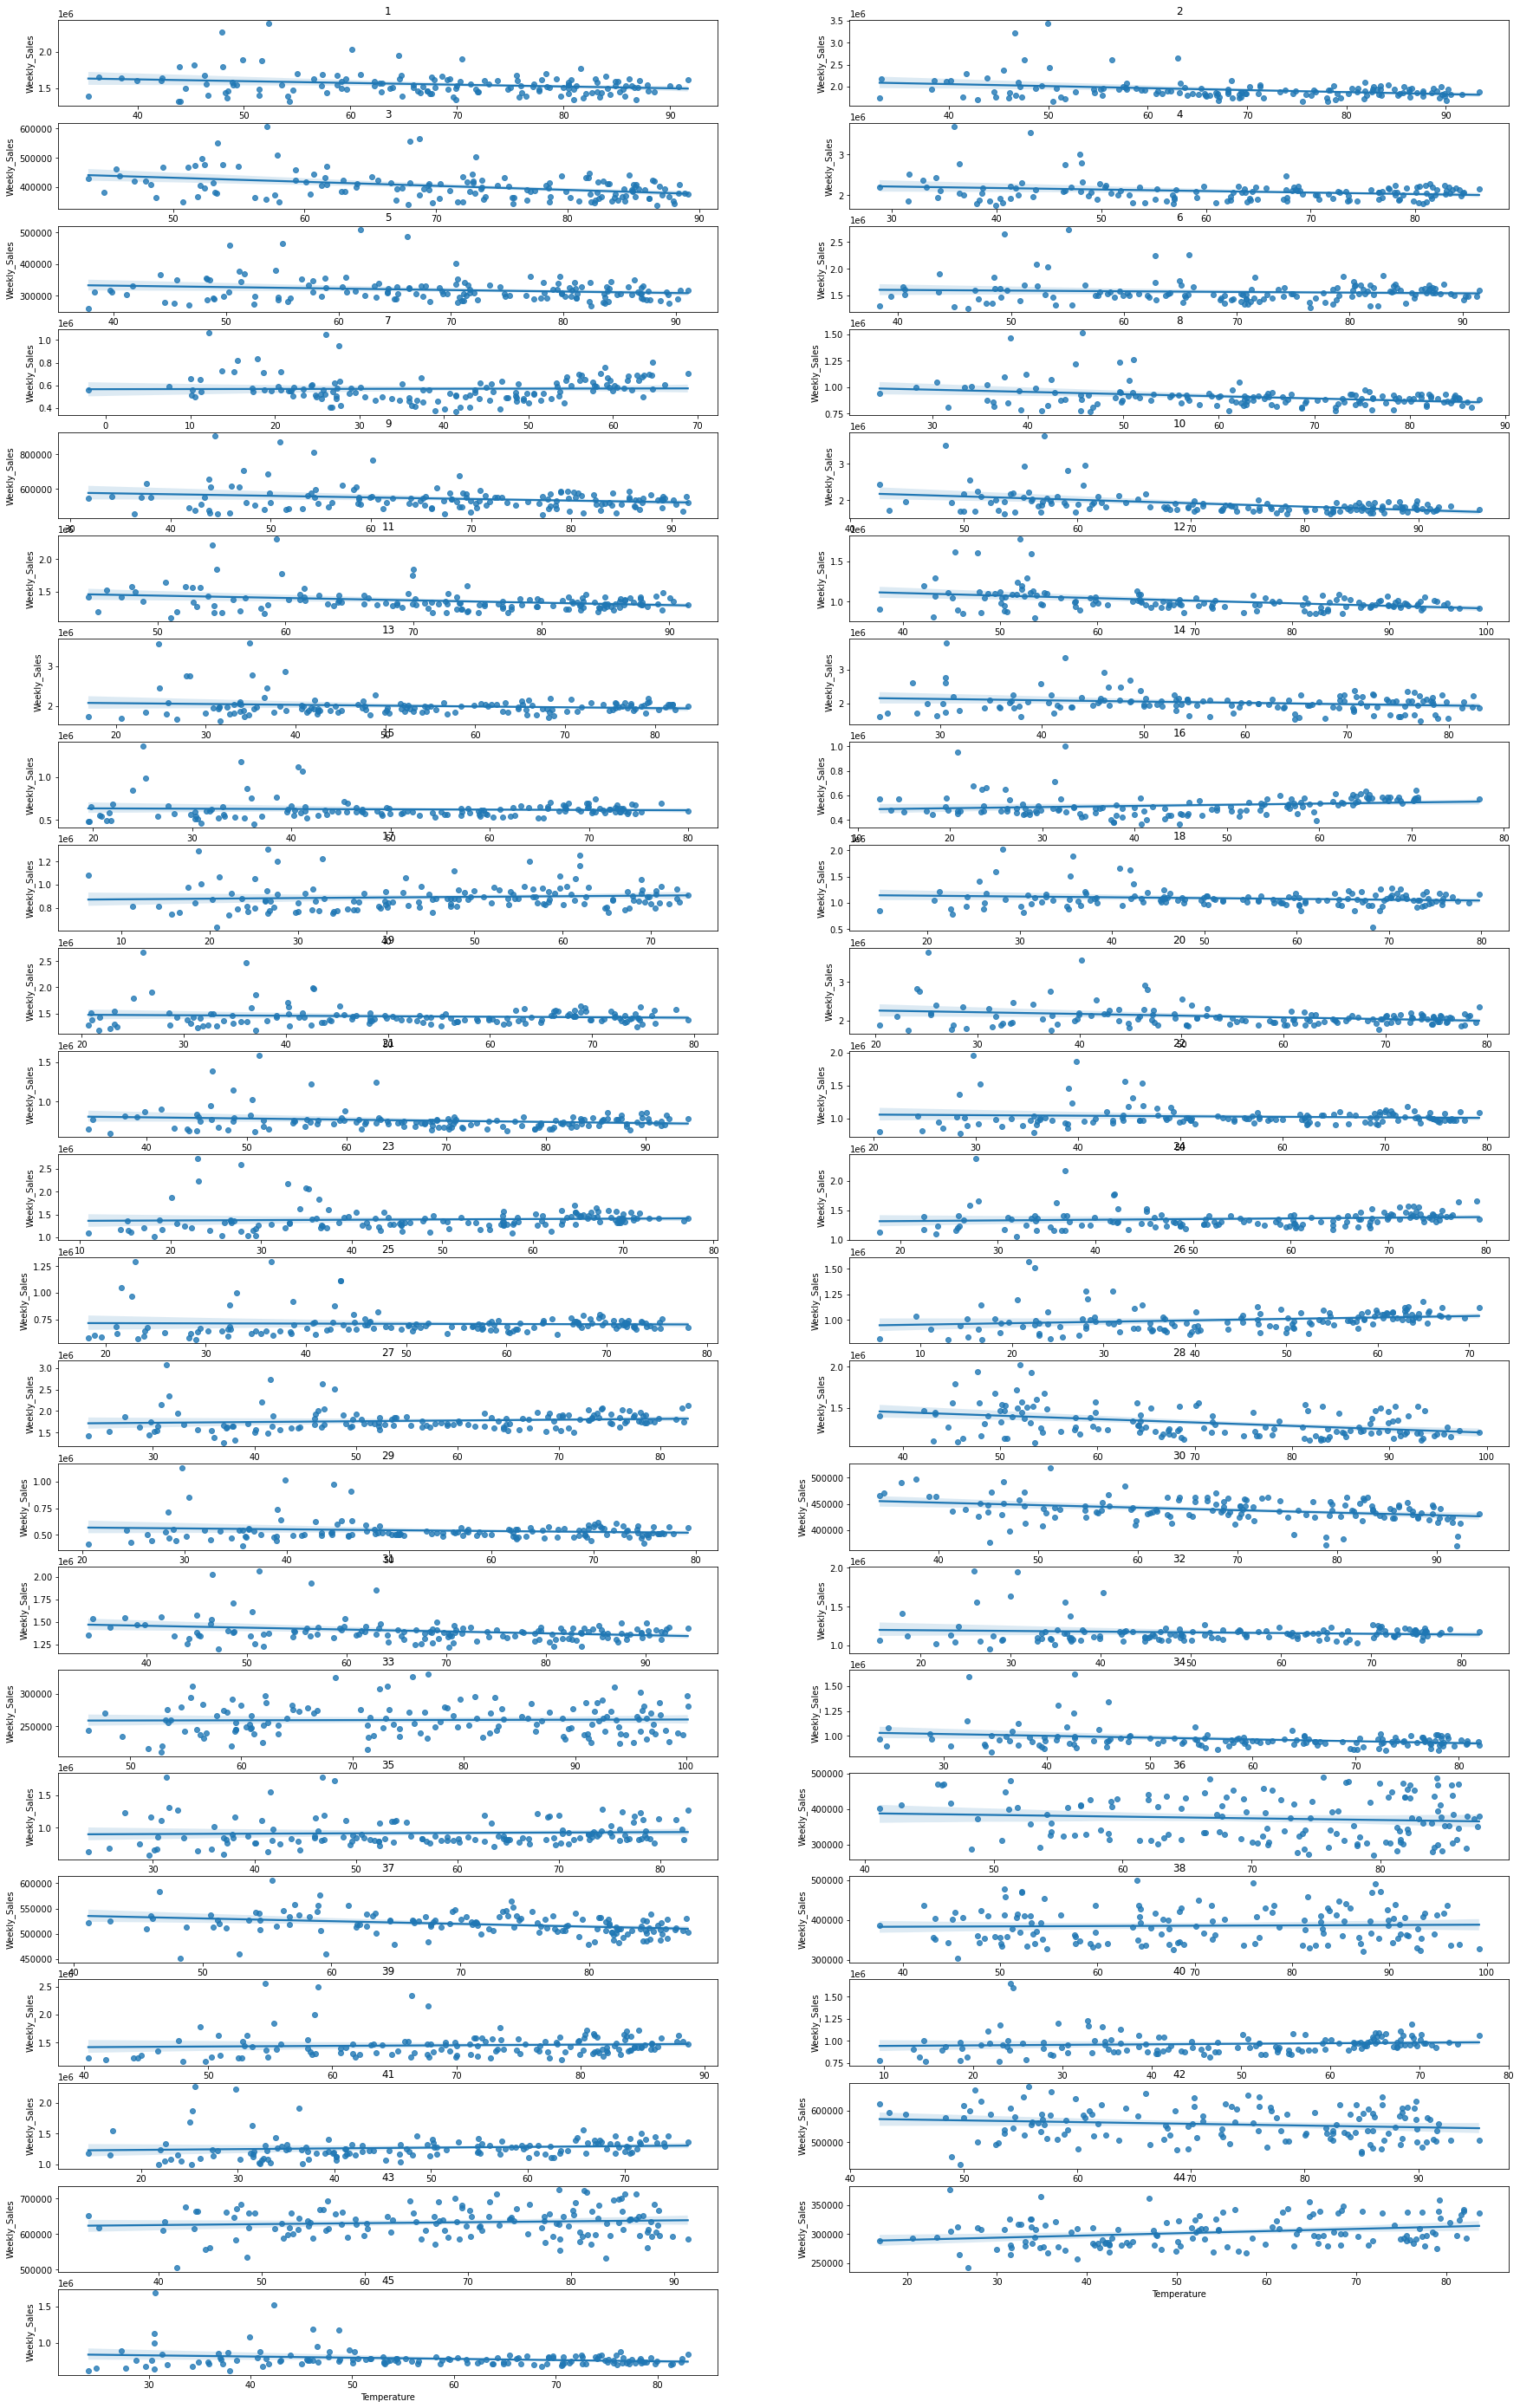

In [47]:
plt.figure(figsize=(30,50))
strs = df.Store.unique()

for index,i in enumerate(strs):
    plt.subplot(23,2,index+1)
    temp = df.loc[df.Store == i]
    sns.regplot(data=temp, x=temp['Temperature'], y=temp['Weekly_Sales'])
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.title(i)

By analyzing the relationship at the individual store level, we can observe that there is a slight negative correlation between sales and temperature on the stores in locations with higher average temperatures. SImilarly we can observe a couple of positive weak correlations in stores with lower average temeperatures. However, in a lot of them we cannoy see any discernible or significant correlation. The evidence is not strong enough to draw such conclusion and therefore it requires further analysis.

## Holiday Analysis

In [48]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

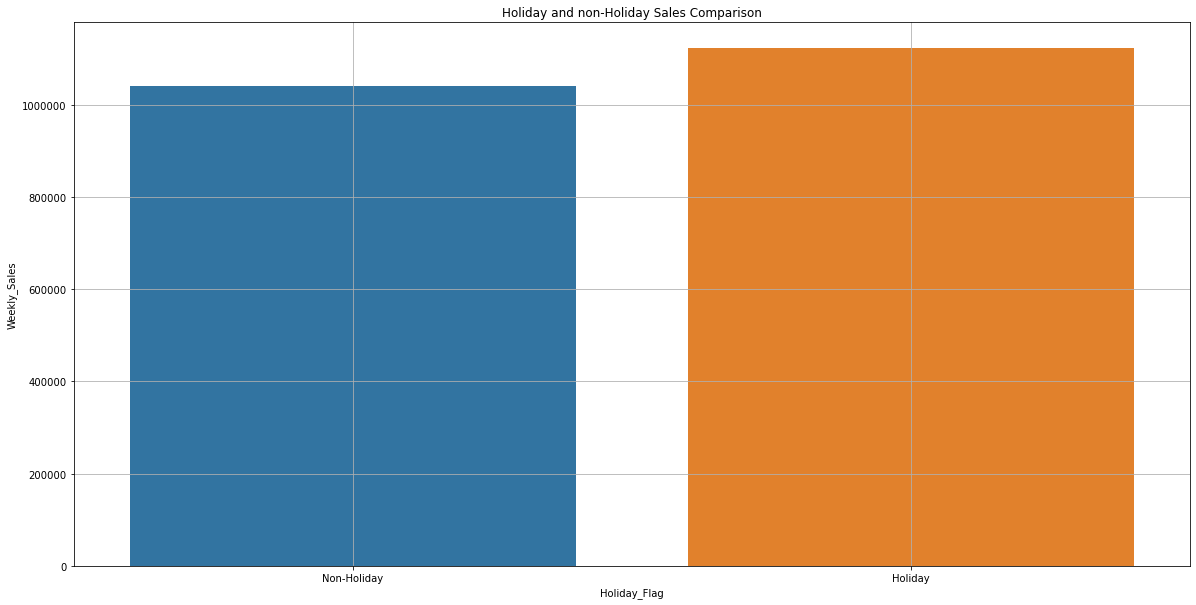

In [49]:
sales_byHoliday = df.groupby("Holiday_Flag").mean()
plt.figure(figsize=(20,10))
sns.barplot(data=sales_byHoliday, x=sales_byHoliday.index, y=sales_byHoliday['Weekly_Sales'])
plt.title('Holiday and non-Holiday Sales Comparison')
plt.xticks([0,1], ["Non-Holiday","Holiday"])
plt.ticklabel_format(useOffset=False,style="plain", axis="y")
plt.grid()

We can observe that during Holidays the averga esales are slightly higher but not by much. We can start by doing this same analysis with each store and see if particular stores have a more pronounced difference in their sales.

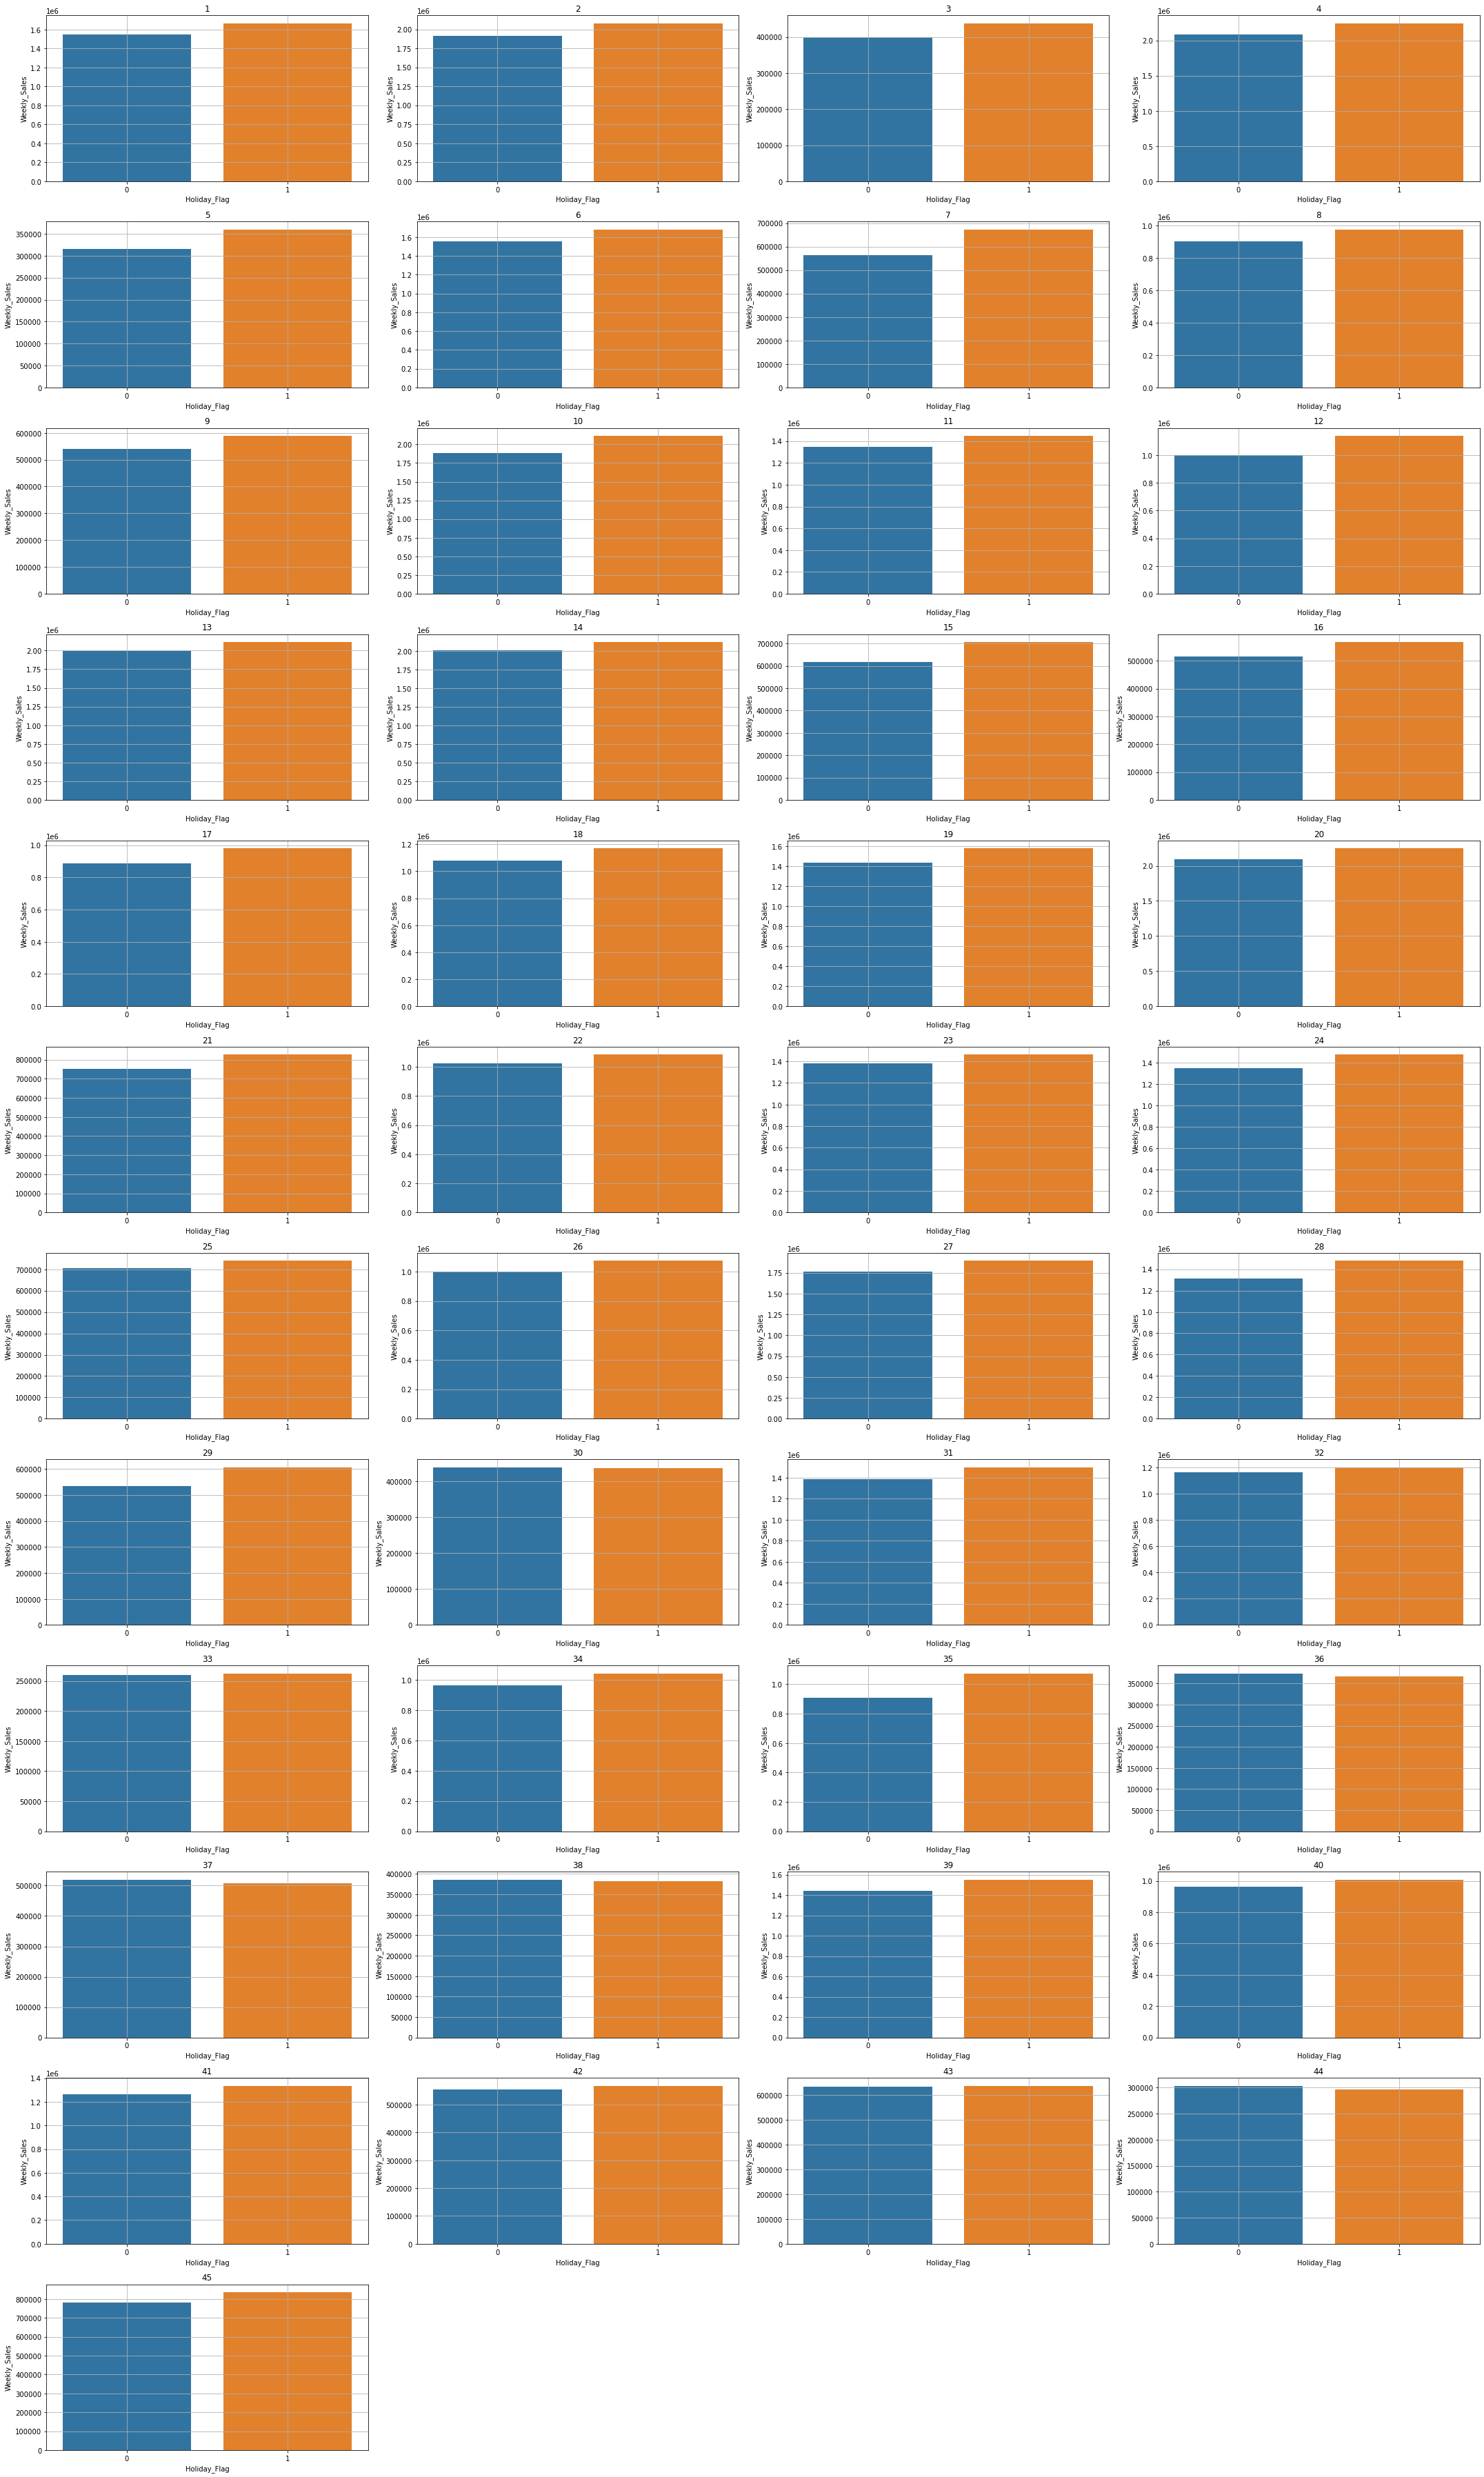

In [52]:
plt.figure(figsize=(30,50))

for index,i in enumerate(strs):
    plt.subplot(12,4,index+1)
    temp = df.loc[df.Store == i]
    temp2 = temp.groupby("Holiday_Flag").mean()
    sns.barplot(data=temp2, x=temp2.index, y=temp2['Weekly_Sales'])
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.rcParams.update({'figure.max_open_warning': 0})

In the majority of cases the difference in sales is about the same and in a few cases the average sales are actually higher in non holiday weeks.